In [4]:
# Importing and Loading the Data

import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
# Checking for Missing values

df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# Check the Output Label

print(df['label'].unique())

# Check the Counts of the Data

df['label'].value_counts()

['ham' 'spam']


ham     4825
spam     747
Name: label, dtype: int64

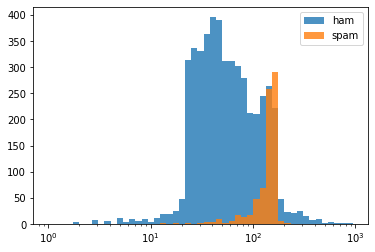

In [8]:
# Data Visualisation

import matplotlib.pyplot as plt
%matplotlib inline

# Plot a Log based Histogram - Length of the text

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# The Insights here is Spam Emails have Larger words/contents

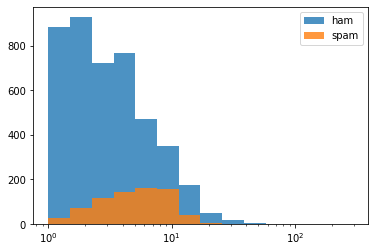

In [9]:
# Plot for Punctuations in the Text

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# There is no Significant insights here

#### Creation of Machine Learning Model - Plain without Count Vectorization

In [10]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

In [12]:
# Creation of Train and Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


In [13]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

# Model Predictions

from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [14]:
# Get Confusion Matrix as a Dataframe
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [16]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# As you can see the Accuracy was good, but it failed to predict Spam Miserably, see Precision/Recall

0.843936922240348
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [17]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

# Printing the Metrics

print(metrics.accuracy_score(y_test,predictions))

print(metrics.classification_report(y_test,predictions))

[[1583   10]
 [ 246    0]]
0.8607939097335509
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [18]:
# Support Vector Classifier

from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

# Printing the Metrics

print(metrics.accuracy_score(y_test,predictions))

print(metrics.classification_report(y_test,predictions))

[[1515   78]
 [ 131  115]]
0.8863512778684067
              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



## Feature Extraction from Text

### 1 - Build a vocabulary

The goal here is to build a numerical array from all the words that appear in every document. Later we'll create instances (vectors) for each individual document.

In [24]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [25]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


#### Showing How Count Vectorizer Works

In [26]:
# Create an empty vector with space for each word in the vocabulary:
one = ['1.txt']+[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    one[vocab[word]]+=1
    
one
# We can see that most of the words in 1.txt appear only once, although "cats" appears twice.

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [28]:
# Do the same for the second document:
two = ['2.txt']+[0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    two[vocab[word]]+=1

In [29]:
# Compare the two vectors:
print(f'{one}\n{two}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


By comparing the vectors we see that some words are common to both, some appear only in 1.txt, others only in 2.txt. Extending this logic to tens of thousands of documents, we would see the vocabulary dictionary grow to hundreds of thousands of words. Vectors would contain mostly zero values, making them sparse matrices.

### 2 - Bag of Words and Tf-idf

In the above examples, each vector can be considered a bag of words. By itself these may not be helpful until we consider term frequencies, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider inverse document frequency, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described here.
Together these terms become tf-idf.

##### Stop Words and Word Stems

Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say cat in place of both cat and cats. This will shrink our vocab array and improve performance.

### Tokenization and Tagging

When we created our vectors the first thing we did was split the incoming text on whitespace with .split(). This was a crude form of tokenization - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated morphology to parse text appropriately.

Once the text is divided, we can go back and tag our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become high dimensional sparse matrices.

### Feature Extraction from Text

In the above,  we applied a simple SVC classification model to the SMSSpamCollection dataset. We tried to predict the ham/spam label based on message length and punctuation counts. In this section we'll actually look at the text of each message and try to perform a classification based on content. We'll take advantage of some of scikit-learn's feature extraction tools.

In [31]:
# We Use the Same Dataset as Above

from sklearn.model_selection import train_test_split

df = pd.read_csv('smsspamcollection.tsv', sep='\t')

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scikit-learn's CountVectorizer

Text preprocessing, tokenizing and the ability to filter out stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

3733 - No of Rows, 7082 - Feature Names/Words. 

This shows that our training set is comprised of 3733 documents, and 7082 features.

#### Transform Counts to Frequencies with Tf-idf

While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.
Both tf and tf–idf can be computed as follows using TfidfTransformer

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

Note: the fit_transform() method actually performs two operations: it fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.

In [34]:
# We can Combine the above 2 Steps (CV + TFIDF Transformer) with TfidVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

#### Creation of Machine Learning Model - with Text Features

In [35]:
# Support Vector Classifier

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

##### Build a Pipeline

Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a Pipeline class that behaves like a compound classifier.

In [36]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

# Get the Predictions
# Form a prediction set
predictions = text_clf.predict(X_test)

# Print out the Metrics

# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[1586    7]
 [  12  234]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839

0.989668297988037


Using the text of the messages, our model performed exceedingly well; it correctly predicted spam 98.97% of the time!
Now let's apply what we've learned to a text classification project involving positive and negative movie reviews.